In [2]:
import pandas as pd
import numpy as np
import scanpy as sc

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
sns.reset_orig()
sc.settings._vector_friendly = True
# p9.theme_set(p9.theme_classic)
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["savefig.transparent"] = True
plt.rcParams["figure.figsize"] = (4, 4)

plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.titleweight"] = 500
plt.rcParams["axes.titlepad"] = 8.0
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = 500
plt.rcParams["axes.linewidth"] = 1.2
plt.rcParams["axes.labelpad"] = 6.0
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

plt.rcParams["font.size"] = 11
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica', "Computer Modern Sans Serif", "DejaVU Sans"]
plt.rcParams['font.weight'] = 500

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['xtick.minor.size'] = 1.375
plt.rcParams['xtick.major.size'] = 2.75
plt.rcParams['xtick.major.pad'] = 2
plt.rcParams['xtick.minor.pad'] = 2

plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['ytick.minor.size'] = 1.375
plt.rcParams['ytick.major.size'] = 2.75
plt.rcParams['ytick.major.pad'] = 2
plt.rcParams['ytick.minor.pad'] = 2

plt.rcParams["legend.fontsize"] = 12
plt.rcParams['legend.handlelength'] = 1.4
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 3
plt.rcParams['legend.frameon'] = False

plt.rcParams['lines.linewidth'] = 1.7

DPI = 300

# Paper figure

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

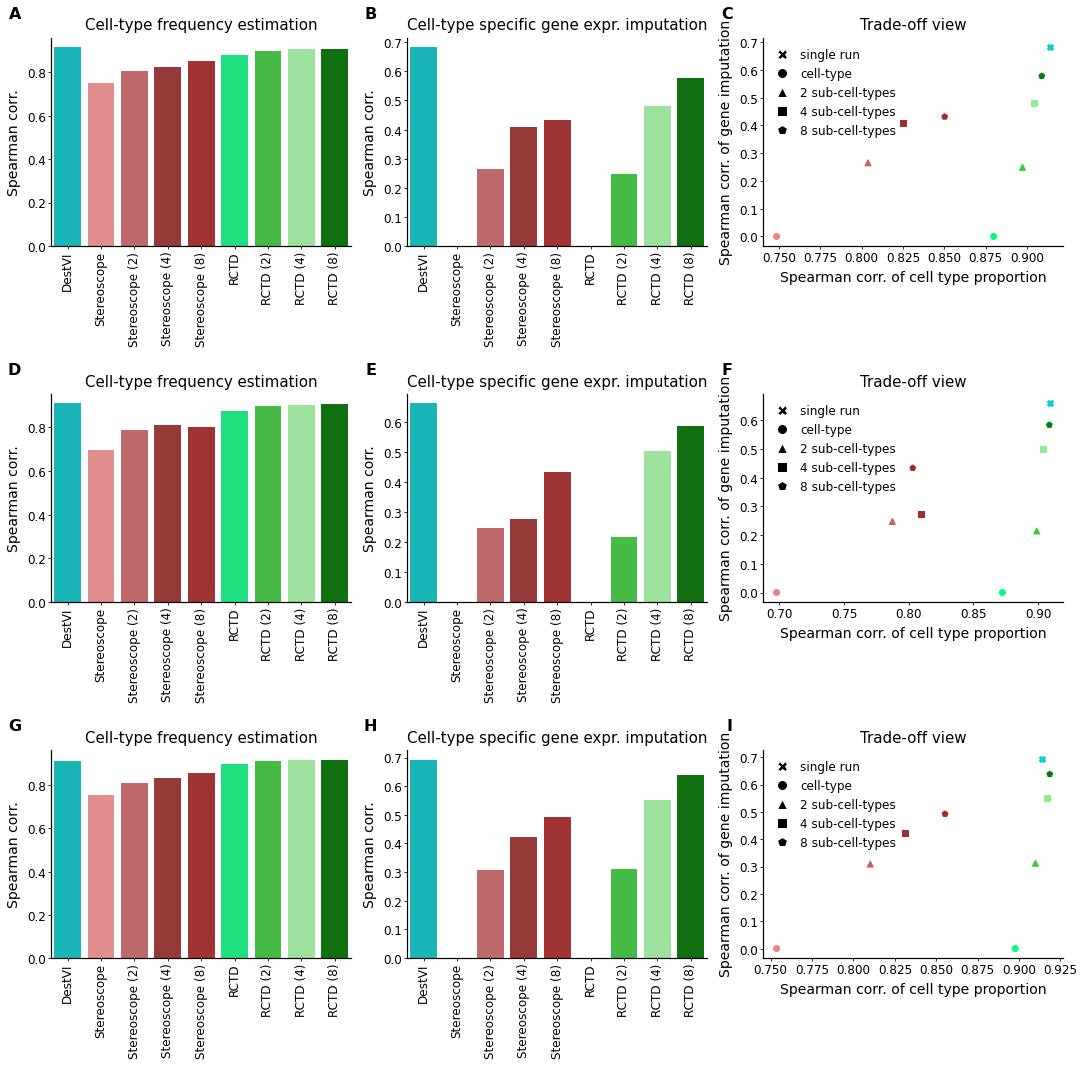

In [4]:
list_dir = ["destvi_latent",
            "stereo0", "stereo1", "stereo2", "stereo3",
            "RCTD0", "RCTD1", "RCTD2", "RCTD3"]
list_text = ["DestVI",
            "Stereoscope", "Stereoscope (2)", "Stereoscope (4)", "Stereoscope (8)",
            "RCTD", "RCTD (2)", "RCTD (4)", "RCTD (8)"]

list_colors = ["darkturquoise",
              "lightcoral", "indianred", "brown", "firebrick",
              "springgreen", "limegreen", "lightgreen", "green", ]
list_markers = ["X",
              "o", "^", "s", "p",
               "o", "^", "s", "p"]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

path_list = ["/home/ubuntu/simu_runs/run_C",
             "/home/ubuntu/simu_runs/run_missing_sc/",
             "/home/ubuntu/simu_runs/run_missing_st/"]

for i, path in enumerate(path_list):
    # load results
    dir_results = {}
    for directory in list_dir:
        dir_results[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)

    # gather cell-type info
    ct_score = []
    for k in dir_results.keys():
        ct_score.append(dir_results[k]["proportions"])
    ct_score = pd.concat(ct_score, axis=1)
    ct_score.columns = list_text

    # gather within-cell type info (e.g., ct0)
    gimp_ct_score = []
    for k in dir_results.keys():
        gimp_ct_score.append(dir_results[k][["ct" + str(i) for i in [0, 1, 2, 4, 5]]].mean(1))
    gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
    gimp_ct_score.columns = list_text


    sns.barplot(ct_score.columns, ct_score.loc["avg_spearman"], ax=axes[i, 0], palette=list_colors)
    axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=90)
    axes[i, 0].set_ylabel("Spearman corr.")
    axes[i, 0].set_title("Cell-type frequency estimation")

    sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_spearman"], ax=axes[i, 1], palette=list_colors)
    axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=90)
    axes[i, 1].set_ylabel("Spearman corr.")
    axes[i, 1].set_title("Cell-type specific gene expr. imputation")

    for marker in np.unique(list_markers):
        mask = np.where(np.array(list_markers) == marker)[0]
    #     list_colors[mask]
        axes[i, 2].scatter(ct_score.loc["avg_spearman"][mask], gimp_ct_score.loc["avg_spearman"][mask], 
                    c=np.array(list_colors)[mask], 
                    marker=marker)

    legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                              markerfacecolor='black', markersize=10),
                      Line2D([0], [0], marker='o', color='w', label='cell-type',
                              markerfacecolor='black', markersize=10),
                      Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                              markerfacecolor='black', markersize=10),
                      Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                              markerfacecolor='black', markersize=10),
                      Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                              markerfacecolor='black', markersize=10),]
    axes[i, 2].set_xlabel("Spearman corr. of cell type proportion")
    axes[i, 2].set_ylabel("Spearman corr. of gene imputation")
    axes[i, 2].set_title("Trade-off view")
    axes[i, 2].legend(handles=legend_elements)
    
alpha = 'ABCDEFGHIJ'
for i in range(3):
    for j in range(3):
        axes[i, j].text(-0.1, 1.15, alpha[i*3+j], transform=axes[i, j].transAxes,
              fontsize=16, fontweight='bold', va='top', ha='right')

plt.tight_layout()
# plt.savefig("figures/benchmarking.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

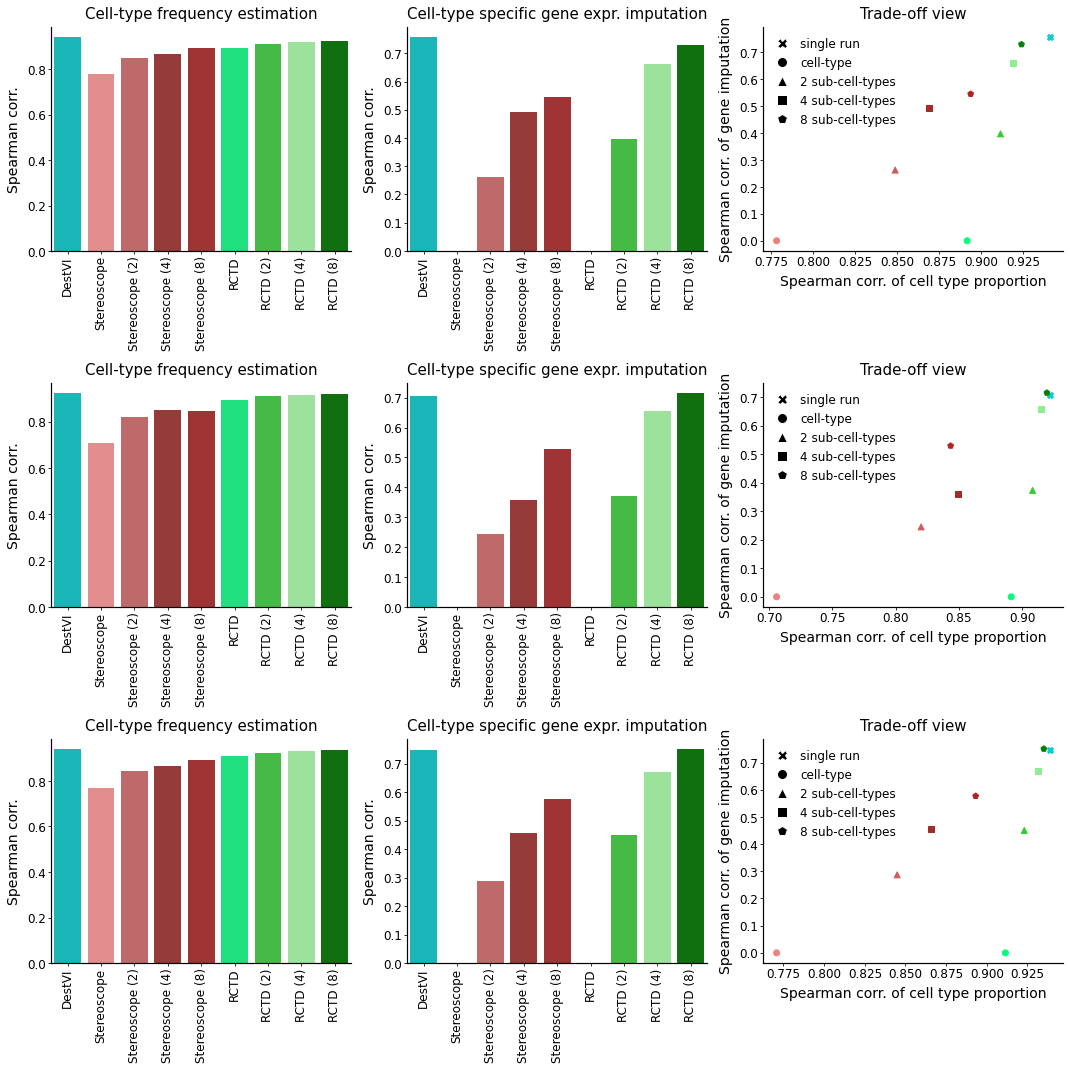

In [825]:
list_dir = ["destvi_latent",
            "stereo0", "stereo1", "stereo2", "stereo3",
            "RCTD0", "RCTD1", "RCTD2", "RCTD3"]
list_text = ["DestVI",
            "Stereoscope", "Stereoscope (2)", "Stereoscope (4)", "Stereoscope (8)",
            "RCTD", "RCTD (2)", "RCTD (4)", "RCTD (8)"]

list_colors = ["darkturquoise",
              "lightcoral", "indianred", "brown", "firebrick",
              "springgreen", "limegreen", "lightgreen", "green", ]
list_markers = ["X",
              "o", "^", "s", "p",
               "o", "^", "s", "p"]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

path_list = ["/home/ubuntu/simu_runs/run_C",
             "/home/ubuntu/simu_runs/run_missing_sc/",
             "/home/ubuntu/simu_runs/run_missing_st/"]

for i, path in enumerate(path_list):
    # load results
    dir_results = {}
    for directory in list_dir:
        dir_results[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)

    # gather cell-type info
    ct_score = []
    for k in dir_results.keys():
        ct_score.append(dir_results[k]["proportions"])
    ct_score = pd.concat(ct_score, axis=1)
    ct_score.columns = list_text

    # gather within-cell type info (e.g., ct0)
    gimp_ct_score = []
    for k in dir_results.keys():
        gimp_ct_score.append(dir_results[k][["ct" + str(i) for i in [0, 1, 2, 4, 5]]].mean(1))
    gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
    gimp_ct_score.columns = list_text


    sns.barplot(ct_score.columns, ct_score.loc["avg_pearson"], ax=axes[i, 0], palette=list_colors)
    axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=90)
    axes[i, 0].set_ylabel("Spearman corr.")
    axes[i, 0].set_title("Cell-type frequency estimation")

    sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_pearson"], ax=axes[i, 1], palette=list_colors)
    axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=90)
    axes[i, 1].set_ylabel("Spearman corr.")
    axes[i, 1].set_title("Cell-type specific gene expr. imputation")

    for marker in np.unique(list_markers):
        mask = np.where(np.array(list_markers) == marker)[0]
    #     list_colors[mask]
        axes[i, 2].scatter(ct_score.loc["avg_pearson"][mask], gimp_ct_score.loc["avg_pearson"][mask], 
                    c=np.array(list_colors)[mask], 
                    marker=marker)

    legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                              markerfacecolor='black', markersize=10),
                      Line2D([0], [0], marker='o', color='w', label='cell-type',
                              markerfacecolor='black', markersize=10),
                      Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                              markerfacecolor='black', markersize=10),
                      Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                              markerfacecolor='black', markersize=10),
                      Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                              markerfacecolor='black', markersize=10),]
    axes[i, 2].set_xlabel("Spearman corr. of cell type proportion")
    axes[i, 2].set_ylabel("Spearman corr. of gene imputation")
    axes[i, 2].set_title("Trade-off view")
    axes[i, 2].legend(handles=legend_elements)

plt.tight_layout()
# plt.savefig("figures/benchmarking.pdf", dpi=DPI)

# Results for more cell types

In [809]:
path = "/home/ubuntu/simu_runs/run_C"
key_destvi = "destvi_latent" 
list_dir = [key_destvi,
            "stereo0", "stereo1", "stereo2", "stereo3",
            "RCTD0", "RCTD1", "RCTD2", "RCTD3"]
list_text = ["DestVI",
            "Stereoscope", "Stereoscope (2)", "Stereoscope (4)", "Stereoscope (8)",
            "RCTD", "RCTD (2)", "RCTD (4)", "RCTD (8)"]

list_colors = ["darkturquoise",
              "lightcoral", "indianred", "brown", "firebrick",
              "springgreen", "limegreen", "lightgreen", "green", ]
list_markers = ["X",
              "o", "^", "s", "p",
               "o", "^", "s", "p"]

dir_results = {}
for directory in list_dir:
    dir_results[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)

In [810]:
dir_results["RCTD2"]

,ct0,ct1,ct2,ct3,ct4,ct5,ct6,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,ct_long5,ct_long6,allct,proportions
avg_spearman,0.646292,0.620634,0.469345,0.265984,0.616045,0.055140,0.240821,0.904583,0.488683,0.267541,0.281136,0.110741,0.417605,-0.098547,0.223779,0.904410
avg_pearson,0.735210,0.690027,0.489168,0.293806,0.669947,0.720282,0.479897,0.950918,0.562766,0.315387,0.292475,0.114736,0.440160,0.534601,0.465645,0.918657
w_spearman,0.745993,0.676199,0.764902,0.362953,0.598283,0.190207,0.308014,0.895658,0.744057,0.395889,0.795692,0.190647,0.588511,-0.230160,0.412836,0.914371
w_pearson,0.838077,0.761376,0.783778,0.416126,0.591265,0.735598,0.642403,0.886704,0.846241,0.543502,0.818932,0.207120,0.580965,0.914072,0.927468,0.925923
iw_spearman,0.608652,0.364278,0.522944,NaN,0.619151,-0.033826,0.194922,0.950612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896434
iw_pearson,0.745523,0.407153,0.545773,NaN,0.667319,0.615494,0.355489,0.976241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912723
median_l1,0.556593,0.831528,0.453304,0.726010,2.451032,0.832592,1.942397,0.041569,0.131663,0.020806,0.009292,0.034130,0.142843,0.051674,0.091432,0.026328
mse,160.760608,39.748129,45.795427,29.635238,1012.890055,158.617844,137.872914,390.194407,137.052616,36.447680,27.330935,18.188712,664.154262,100.906159,116.182873,0.052402
w_median_l1,1261.095078,218.902810,160.677888,99.690179,2451.224790,646.450197,417.787448,258.521925,1227.153237,290.869565,134.228137,57.588166,2354.749643,794.593313,973.244565,0.028324
w_mse,1659.307503,457.157868,260.370727,187.351312,13730.073793,1428.240289,1191.517563,6412.052666,1561.343773,417.832131,219.033654,120.013202,13366.757522,1147.994273,1336.092795,0.053630


In [811]:
dir_results[key_destvi]

,ct0,ct1,ct2,ct3,ct4,ct5,ct6,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,ct_long5,ct_long6,allct,proportions
avg_spearman,0.808450,0.550789,0.679106,0.194720,0.803992,0.569106,0.287738,0.907866,0.737509,0.240516,0.428601,-0.041629,0.508168,0.317313,0.277660,0.913760
avg_pearson,0.866872,0.568176,0.700535,0.210781,0.806354,0.842382,0.404651,0.981022,0.811726,0.266855,0.421548,-0.017958,0.496133,0.532199,0.528442,0.940769
w_spearman,0.817167,0.618649,0.856718,0.508480,0.944262,0.664311,0.310271,0.961762,0.801079,0.502106,0.881710,0.011820,0.920130,0.736879,0.465530,0.920893
w_pearson,0.927839,0.640638,0.862864,0.511559,0.920209,0.903540,0.588312,0.982908,0.932190,0.484348,0.885116,0.001249,0.895907,0.963790,0.929794,0.945812
iw_spearman,0.745478,0.178568,0.611811,NaN,0.738775,0.491855,0.240002,0.698929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.908432
iw_pearson,0.863367,0.200833,0.644673,NaN,0.739079,0.772530,0.333777,0.942752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.937077
median_l1,0.282668,0.604693,0.590645,1.526594,1.371946,0.646491,1.366320,0.086864,0.080802,0.042517,0.026403,0.086990,0.219315,0.117078,0.206778,0.025105
mse,76.478589,39.194857,37.001645,104.153522,420.069252,24.688835,51.212453,163.122075,62.392519,28.595481,25.399403,65.066322,276.136172,27.011239,42.433330,0.044538
w_median_l1,417.897947,232.031061,238.117322,1038.902145,1315.211953,92.825912,159.049868,269.411226,360.663485,171.125295,213.960741,490.011880,1274.709804,255.906972,317.699069,0.026201
w_mse,938.474196,467.228342,406.811930,1610.140333,5783.188506,182.167087,435.389185,2725.178432,855.348402,344.068490,347.837451,987.590991,5633.323199,350.464493,481.452322,0.045580


In [812]:
# gather cell-type info
ct_score = []
for k in dir_results.keys():
    ct_score.append(dir_results[k]["proportions"])
ct_score = pd.concat(ct_score, axis=1)
ct_score.columns = list_text

# gather within-cell type info (e.g., ct0)
gimp_ct_score = []
for k in dir_results.keys():
    gimp_ct_score.append(dir_results[k][["ct" + str(i) for i in [0, 1, 2, 4, 5]]].mean(1))
gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
gimp_ct_score.columns = list_text

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


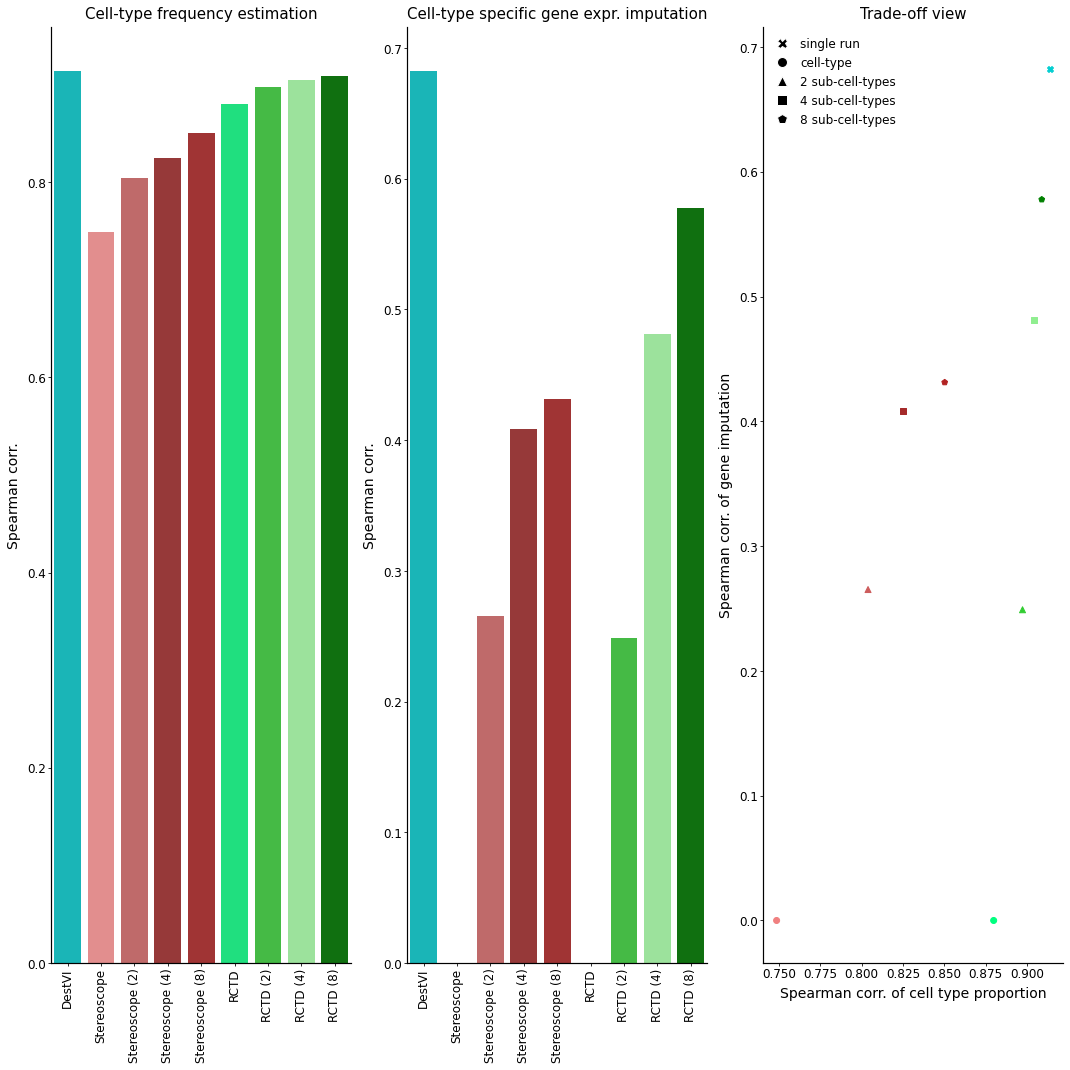

In [815]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))


sns.barplot(ct_score.columns, ct_score.loc["avg_spearman"], ax=axes[0], palette=list_colors)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Spearman corr.")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_spearman"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel("Spearman corr.")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_spearman"][mask], gimp_ct_score.loc["avg_spearman"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
    
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Spearman corr. of cell type proportion")
axes[2].set_ylabel("Spearman corr. of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


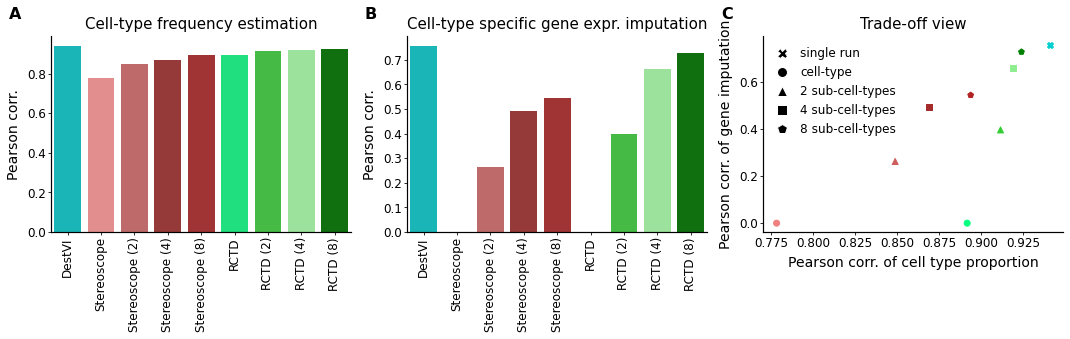

In [335]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["avg_pearson"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Pearson corr.")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_pearson"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("Pearson corr.")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_pearson"][mask], gimp_ct_score.loc["avg_pearson"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Pearson corr. of cell type proportion")
axes[2].set_ylabel("Pearson corr. of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


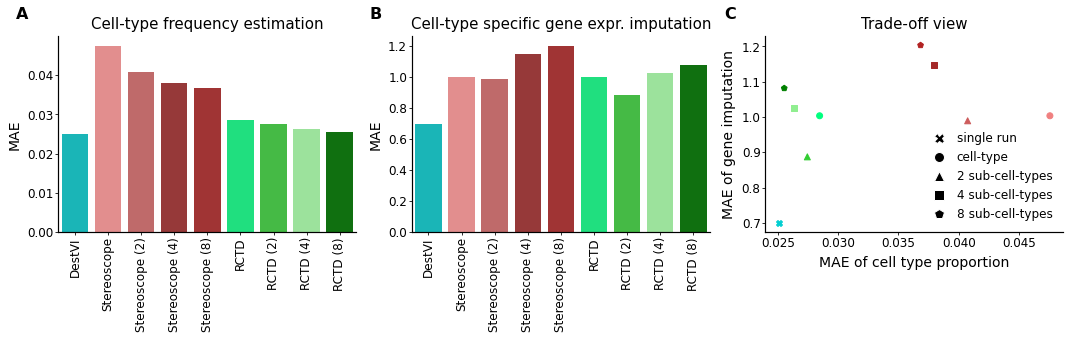

In [336]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["median_l1"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("MAE")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["median_l1"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("MAE")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["median_l1"][mask], gimp_ct_score.loc["median_l1"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("MAE of cell type proportion")
axes[2].set_ylabel("MAE of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)

# Missing cell type in scRNA-seq

In [816]:
path = "/home/ubuntu/simu_runs/run_missing_sc"
key_destvi = "destvi_latent" 
list_dir = [key_destvi,
            "stereo0", "stereo1", "stereo2", "stereo3",
            "RCTD0", "RCTD1", "RCTD2", "RCTD3"]
list_text = ["DestVI",
            "Stereoscope", "Stereoscope (2)", "Stereoscope (4)", "Stereoscope (8)",
            "RCTD", "RCTD (2)", "RCTD (4)", "RCTD (8)"]

list_colors = ["darkturquoise",
              "lightcoral", "indianred", "brown", "firebrick",
              "springgreen", "limegreen", "lightgreen", "green", ]
list_markers = ["X",
              "o", "^", "s", "p",
               "o", "^", "s", "p"]

dir_results = {}
for directory in list_dir:
    dir_results[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)

In [817]:
dir_results["RCTD2"]

,ct0,ct1,ct2,ct3,ct4,ct5,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,ct_long5,allct,proportions
avg_spearman,0.618976,0.562240,0.473038,0.399041,0.679488,0.169417,0.860678,0.468532,0.237986,0.285330,0.200212,0.451817,-0.038663,0.903904
avg_pearson,0.687972,0.649057,0.465888,0.405241,0.738107,0.742965,0.876443,0.527333,0.292202,0.288445,0.198780,0.480557,0.530562,0.914786
w_spearman,0.725376,0.631527,0.768918,0.575709,0.776542,0.259321,0.869943,0.735220,0.309067,0.802334,0.442485,0.758338,-0.208424,0.915139
w_pearson,0.795803,0.704918,0.798091,0.601347,0.779688,0.775963,0.802171,0.808722,0.390359,0.841176,0.448946,0.760803,0.916514,0.922584
iw_spearman,0.609585,0.345566,0.529876,NaN,0.641941,0.102622,0.932876,NaN,NaN,NaN,NaN,NaN,NaN,0.894034
iw_pearson,0.722064,0.382592,0.536113,NaN,0.703288,0.642739,0.926246,NaN,NaN,NaN,NaN,NaN,NaN,0.908273
median_l1,0.562551,0.851574,0.447021,0.724592,2.420771,0.821123,0.043239,0.140989,0.021743,0.008971,0.033517,0.141286,0.051854,0.031096
mse,162.170814,41.943919,44.143321,29.691479,959.661122,159.152459,404.955564,138.237131,38.835492,26.315336,18.179070,629.281203,101.328413,0.062019
w_median_l1,1265.269620,234.939250,149.921841,106.603922,2509.416892,647.864310,256.569397,1237.251044,307.901092,125.571497,54.477861,2408.674798,794.706315,0.034137
w_mse,1681.163537,480.971565,246.458968,171.701116,12987.777735,1433.217344,6419.700633,1581.254362,444.190022,207.550127,110.031032,12644.244723,1154.122157,0.063029


In [818]:
dir_results[key_destvi]

,ct0,ct1,ct2,ct3,ct4,ct5,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,ct_long5,allct,proportions
avg_spearman,0.709549,0.393288,0.785148,0.196316,0.806368,0.606678,0.855471,0.633484,0.252232,0.361190,0.165672,0.504869,0.178679,0.909050
avg_pearson,0.739882,0.350633,0.778751,0.190744,0.810731,0.854744,0.895450,0.661443,0.335826,0.347626,0.157917,0.491966,0.527809,0.922000
w_spearman,0.724260,0.405330,0.902415,0.089928,0.922905,0.678583,0.906225,0.721722,0.379205,0.916444,0.180819,0.901058,0.744520,0.917700
w_pearson,0.817211,0.492425,0.911208,0.085233,0.907478,0.881700,0.891090,0.829507,0.576312,0.918783,0.181218,0.885447,0.959274,0.929616
iw_spearman,0.703109,0.067862,0.677672,NaN,0.757075,0.558854,0.706458,NaN,NaN,NaN,NaN,NaN,NaN,0.901914
iw_pearson,0.716324,0.074517,0.695851,NaN,0.747891,0.808155,0.919643,NaN,NaN,NaN,NaN,NaN,NaN,0.916083
median_l1,0.374523,1.093952,0.843895,2.321276,1.426456,0.760699,0.100038,0.093315,0.054431,0.029124,0.110302,0.232815,0.110620,0.029482
mse,90.761860,52.549814,91.333840,49.474601,409.375415,34.367187,232.269780,75.248399,39.018862,54.794591,32.180910,269.284992,78.744171,0.058174
w_median_l1,445.237171,304.129985,601.417315,151.717159,1991.499544,98.267839,483.086448,406.541047,237.800580,441.730729,128.188040,1921.732554,888.548757,0.030315
w_mse,930.088527,615.673491,1103.845073,240.890320,5607.713571,250.965760,3413.083915,859.641003,466.342645,864.486504,183.188014,5463.256114,1338.301203,0.058355


In [819]:
# gather cell-type info
ct_score = []
for k in dir_results.keys():
    ct_score.append(dir_results[k]["proportions"])
ct_score = pd.concat(ct_score, axis=1)
ct_score.columns = list_text

# gather within-cell type info (e.g., ct0)
gimp_ct_score = []
for k in dir_results.keys():
    gimp_ct_score.append(dir_results[k][["ct" + str(i) for i in [0, 1, 2, 4, 5]]].mean(1))
gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
gimp_ct_score.columns = list_text

In [820]:
ct_score

,DestVI,Stereoscope,Stereoscope (2),Stereoscope (4),Stereoscope (8),RCTD,RCTD (2),RCTD (4),RCTD (8)
avg_spearman,0.909050,0.697925,0.787377,0.809329,0.803142,0.872426,0.898963,0.903904,0.908702
avg_pearson,0.922000,0.705968,0.820246,0.849728,0.843598,0.891515,0.908416,0.914786,0.919733
w_spearman,0.917700,0.712924,0.805188,0.829485,0.825239,0.887884,0.910315,0.915139,0.919189
w_pearson,0.929616,0.721090,0.835504,0.863033,0.857771,0.902649,0.917281,0.922584,0.927250
iw_spearman,0.901914,0.685585,0.772498,0.792852,0.785159,0.857953,0.888991,0.894034,0.899472
iw_pearson,0.916083,0.695395,0.808537,0.839251,0.832409,0.881732,0.900862,0.908273,0.913392
median_l1,0.029482,0.058878,0.048759,0.044986,0.045009,0.033499,0.031839,0.031096,0.030226
mse,0.058174,0.111890,0.093547,0.088687,0.087214,0.073800,0.065348,0.062019,0.059893
w_median_l1,0.030315,0.064789,0.051008,0.047622,0.047342,0.036610,0.033696,0.034137,0.032850
w_mse,0.058355,0.115278,0.093098,0.088569,0.088511,0.074301,0.065257,0.063029,0.060454


In [821]:
gimp_ct_score

,DestVI,Stereoscope,Stereoscope (2),Stereoscope (4),Stereoscope (8),RCTD,RCTD (2),RCTD (4),RCTD (8)
avg_spearman,0.660206,0.000000,0.247576,0.274876,0.434027,0.000000,0.214589,0.500632,0.584034
avg_pearson,0.706948,0.000000,0.244834,0.358541,0.528986,0.000000,0.372715,0.656798,0.714677
w_spearman,0.726699,0.000000,0.309417,0.362869,0.536129,0.000000,0.283515,0.632337,0.689718
w_pearson,0.802005,0.000000,0.301226,0.480652,0.662591,0.000000,0.449262,0.770893,0.809611
iw_spearman,0.552914,0.000000,0.291009,0.276769,0.415723,0.000000,0.257873,0.445918,0.474927
iw_pearson,0.608548,0.000000,0.290953,0.361954,0.497751,0.000000,0.403963,0.597359,0.606019
median_l1,0.899905,1.003345,1.006228,1.174948,1.190613,1.003345,0.899493,1.020608,1.124116
mse,135.677623,265.965564,251.805584,268.508543,235.643203,265.965564,229.788205,273.414327,245.973741
w_median_l1,688.110371,1282.462144,1298.245286,1040.341884,840.081955,1282.462144,1089.866054,961.482383,731.411874
w_mse,1701.657284,3235.733417,3073.399280,3208.893897,2901.638326,3235.733417,2863.811054,3365.917830,3090.998807


/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


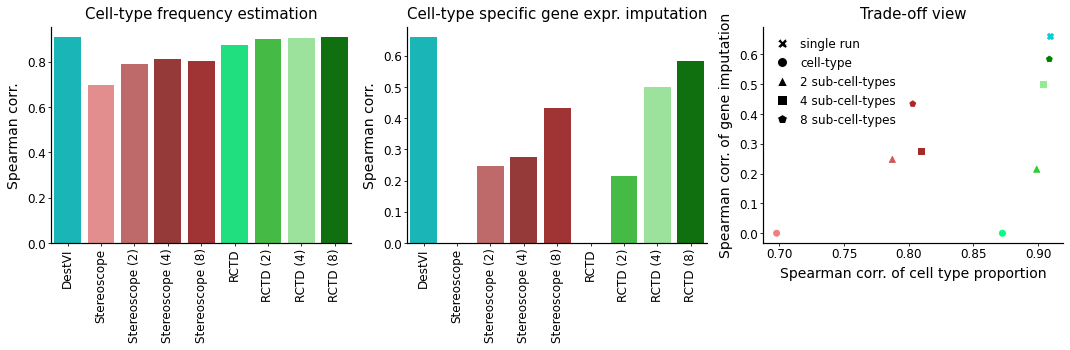

In [822]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["avg_spearman"], ax=axes[0], palette=list_colors)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Spearman corr.")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_spearman"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel("Spearman corr.")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_spearman"][mask], gimp_ct_score.loc["avg_spearman"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
    
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Spearman corr. of cell type proportion")
axes[2].set_ylabel("Spearman corr. of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


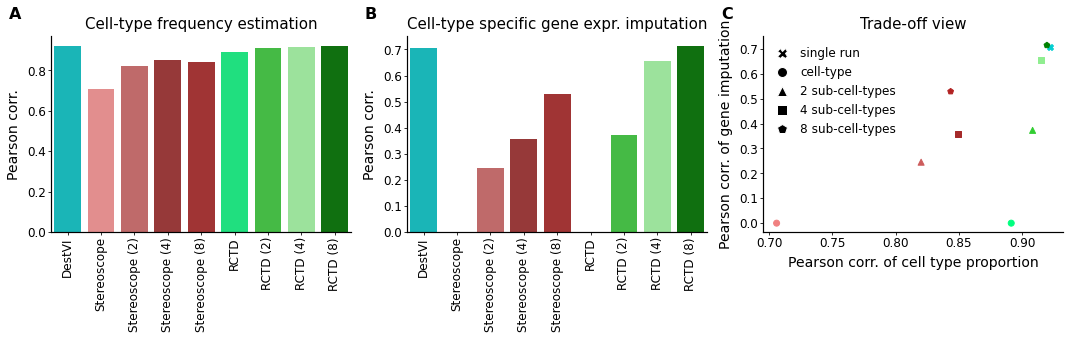

In [344]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["avg_pearson"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Pearson corr.")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_pearson"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("Pearson corr.")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_pearson"][mask], gimp_ct_score.loc["avg_pearson"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Pearson corr. of cell type proportion")
axes[2].set_ylabel("Pearson corr. of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


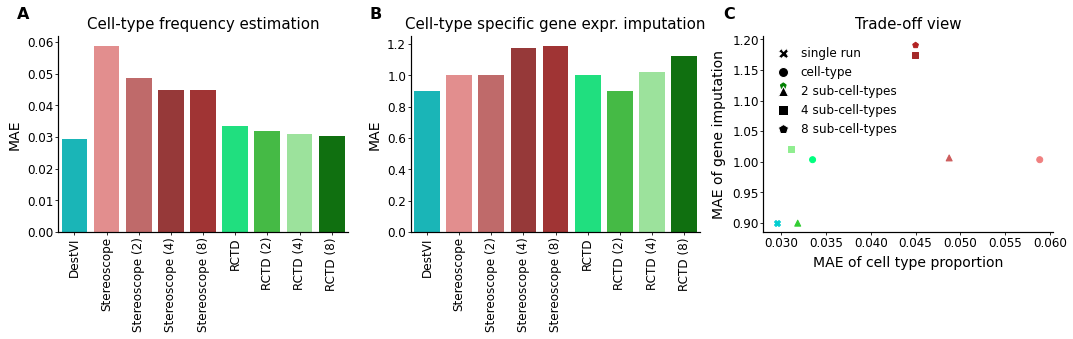

In [345]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["median_l1"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("MAE")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["median_l1"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("MAE")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["median_l1"][mask], gimp_ct_score.loc["median_l1"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("MAE of cell type proportion")
axes[2].set_ylabel("MAE of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)

# Missing cell type in spatial data

In [747]:
path = "/home/ubuntu/simu_runs/run_missing_st"
key_destvi = "destvi_latent" 
list_dir = [key_destvi,
            "stereo0", "stereo1", "stereo2", "stereo3",
            "RCTD0", "RCTD1", "RCTD2", "RCTD3"]
list_text = ["DestVI",
            "Stereoscope", "Stereoscope (2)", "Stereoscope (4)", "Stereoscope (8)",
            "RCTD", "RCTD (2)", "RCTD (4)", "RCTD (8)"]

list_colors = ["darkturquoise",
              "lightcoral", "indianred", "brown", "firebrick",
              "springgreen", "limegreen", "lightgreen", "green", ]
list_markers = ["X",
              "o", "^", "s", "p",
               "o", "^", "s", "p"]

dir_results = {}
for directory in list_dir:
    dir_results[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)

In [748]:
dir_results["RCTD2"]

,ct0,ct1,ct2,ct3,ct4,ct5,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,ct_long5,allct,proportions
avg_spearman,0.688885,0.611949,0.488213,0.543584,0.648118,0.324063,0.910544,0.522856,0.281293,0.290337,0.302108,0.496803,0.109657,0.916598
avg_pearson,0.747110,0.592006,0.511209,0.513297,0.704802,0.792427,0.954478,0.575736,0.280350,0.300363,0.285192,0.525150,0.555624,0.931523
w_spearman,0.773035,0.660374,0.782079,0.726064,0.592831,0.409857,0.900836,0.767255,0.571791,0.817911,0.713572,0.591963,0.127874,0.923366
w_pearson,0.849350,0.648073,0.784933,0.703748,0.605035,0.855309,0.876711,0.855469,0.560208,0.821968,0.681821,0.603536,0.953357,0.936143
iw_spearman,0.666427,0.332546,0.535571,NaN,0.650432,0.233296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910939
iw_pearson,0.769753,0.315215,0.548352,NaN,0.705324,0.680500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.927824
median_l1,0.480630,0.786767,0.526161,0.723730,2.358545,0.820948,0.041726,0.108493,0.019514,0.009660,0.033182,0.148988,0.051875,0.029037
mse,151.745350,37.083285,51.358176,30.121674,944.839054,152.102413,364.480380,129.461676,32.725472,30.813969,18.341072,619.596603,96.952559,0.060320
w_median_l1,1126.781026,211.795703,188.016423,98.319660,2653.417661,690.042406,270.078553,1106.092749,270.482136,158.882600,50.402324,2550.706078,777.821045,0.031109
w_mse,1571.290246,429.685776,298.157788,190.881496,12404.395343,1416.225665,5931.750864,1480.365530,377.610983,252.535831,118.711296,12079.986852,1121.937835,0.061010


In [749]:
dir_results[key_destvi]

,ct0,ct1,ct2,ct3,ct4,ct5,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,ct_long5,allct,proportions
avg_spearman,0.788495,0.588240,0.590091,0.153189,0.850622,0.648082,0.894189,0.649921,0.285524,0.420388,-0.032170,0.569561,0.382317,0.913848
avg_pearson,0.766484,0.648267,0.611167,0.213527,0.842439,0.871042,0.964512,0.626111,0.353038,0.435286,-0.025996,0.547074,0.552188,0.938708
w_spearman,0.819535,0.632377,0.782113,0.422951,0.953268,0.732403,0.950016,0.815882,0.545900,0.805886,0.071606,0.936555,0.766996,0.922379
w_pearson,0.835881,0.708631,0.789079,0.456859,0.929860,0.935779,0.980679,0.845264,0.685358,0.818974,0.109038,0.913381,0.975153,0.943781
iw_spearman,0.761772,0.298288,0.589460,NaN,0.787815,0.572212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907012
iw_pearson,0.723530,0.454327,0.604256,NaN,0.778846,0.802422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934891
median_l1,0.497930,0.718906,0.730905,1.566065,1.349922,0.681996,0.091391,0.132569,0.042076,0.027662,0.092256,0.217730,0.118341,0.028200
mse,152.140098,44.336520,53.409726,103.554058,364.106126,25.290820,148.368332,123.934956,32.108402,35.088285,65.895695,239.407776,28.440404,0.049774
w_median_l1,1084.872387,253.054252,298.109631,1031.299173,847.633318,99.368971,351.856521,962.137229,185.087667,262.076351,522.097711,822.744068,299.142290,0.029471
w_mse,1934.510432,546.917166,604.340719,1597.071430,4839.132594,193.107837,2436.288129,1764.115704,398.495234,503.234921,993.433351,4715.553693,445.372666,0.051048


In [750]:
# gather cell-type info
ct_score = []
for k in dir_results.keys():
    ct_score.append(dir_results[k]["proportions"])
ct_score = pd.concat(ct_score, axis=1)
ct_score.columns = list_text

# gather within-cell type info (e.g., ct0)
gimp_ct_score = []
for k in dir_results.keys():
    gimp_ct_score.append(dir_results[k][["ct" + str(i) for i in [0, 1, 2, 4, 5]]].mean(1))
gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
gimp_ct_score.columns = list_text

In [751]:
ct_score

,DestVI,Stereoscope,Stereoscope (2),Stereoscope (4),Stereoscope (8),RCTD,RCTD (2),RCTD (4),RCTD (8)
avg_spearman,0.913848,0.753606,0.810163,0.831266,0.855317,0.897685,0.909922,0.916598,0.918574
avg_pearson,0.938708,0.770772,0.844879,0.865874,0.893135,0.911418,0.923013,0.931523,0.935047
w_spearman,0.922379,0.758503,0.827108,0.850048,0.869580,0.904887,0.917314,0.923366,0.924879
w_pearson,0.943781,0.778586,0.856286,0.874971,0.899468,0.918168,0.929233,0.936143,0.939445
iw_spearman,0.907012,0.750145,0.796724,0.816369,0.843970,0.891756,0.903782,0.910939,0.913250
iw_pearson,0.934891,0.765995,0.836602,0.859171,0.888464,0.905835,0.917890,0.927824,0.931436
median_l1,0.028200,0.053825,0.044529,0.044092,0.041850,0.033171,0.031083,0.029037,0.028795
mse,0.049774,0.109188,0.087758,0.085523,0.080228,0.074774,0.064571,0.060320,0.059044
w_median_l1,0.029471,0.065978,0.050272,0.048046,0.045935,0.038047,0.033504,0.031109,0.031099
w_mse,0.051048,0.117462,0.092216,0.088113,0.082267,0.075071,0.065279,0.061010,0.059754


In [752]:
gimp_ct_score

,DestVI,Stereoscope,Stereoscope (2),Stereoscope (4),Stereoscope (8),RCTD,RCTD (2),RCTD (4),RCTD (8)
avg_spearman,0.693106,0.000000,0.309049,0.421999,0.492472,0.000000,0.312389,0.552246,0.638000
avg_pearson,0.747880,0.000000,0.286914,0.456068,0.576876,0.000000,0.450414,0.669511,0.750509
w_spearman,0.783939,0.000000,0.358640,0.536033,0.642851,0.000000,0.351649,0.643635,0.744627
w_pearson,0.839846,0.000000,0.344557,0.595033,0.737784,0.000000,0.500798,0.748540,0.851262
iw_spearman,0.601909,0.000000,0.339320,0.387457,0.434435,0.000000,0.347446,0.483654,0.528008
iw_pearson,0.672676,0.000000,0.319685,0.428908,0.515948,0.000000,0.473642,0.603829,0.644146
median_l1,0.795932,1.045464,1.019203,1.145408,1.203202,1.045464,0.917140,0.994610,1.067656
mse,127.856658,256.101362,246.040963,249.718834,218.641931,256.101362,228.774603,267.425656,235.274864
w_median_l1,516.607712,1304.856926,1285.791309,1034.666719,826.593183,1304.856926,1111.756880,974.010644,732.180525
w_mse,1623.601750,3029.031565,2929.244487,2909.781110,2601.685796,3029.031565,2764.088210,3223.950964,2870.455865


/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


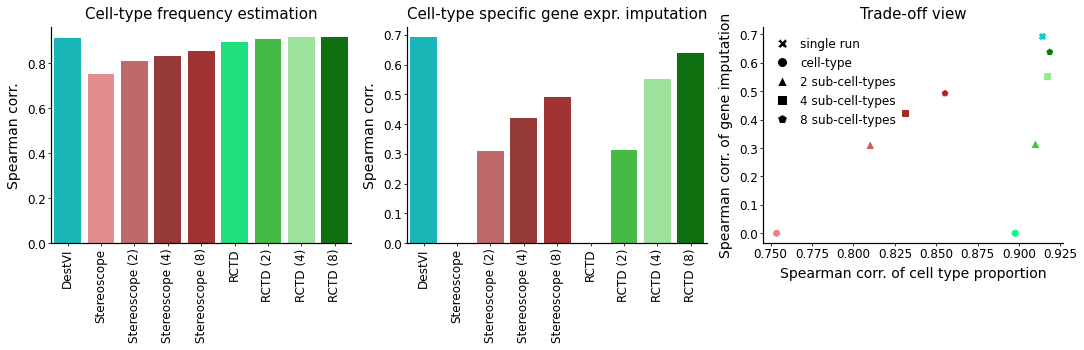

In [753]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["avg_spearman"], ax=axes[0], palette=list_colors)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Spearman corr.")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_spearman"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel("Spearman corr.")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_spearman"][mask], gimp_ct_score.loc["avg_spearman"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
    
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Spearman corr. of cell type proportion")
axes[2].set_ylabel("Spearman corr. of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


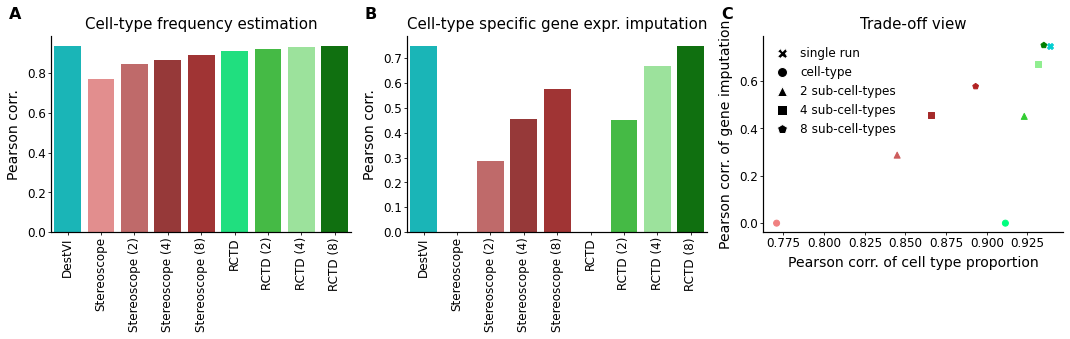

In [754]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["avg_pearson"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Pearson corr.")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_pearson"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("Pearson corr.")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_pearson"][mask], gimp_ct_score.loc["avg_pearson"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Pearson corr. of cell type proportion")
axes[2].set_ylabel("Pearson corr. of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


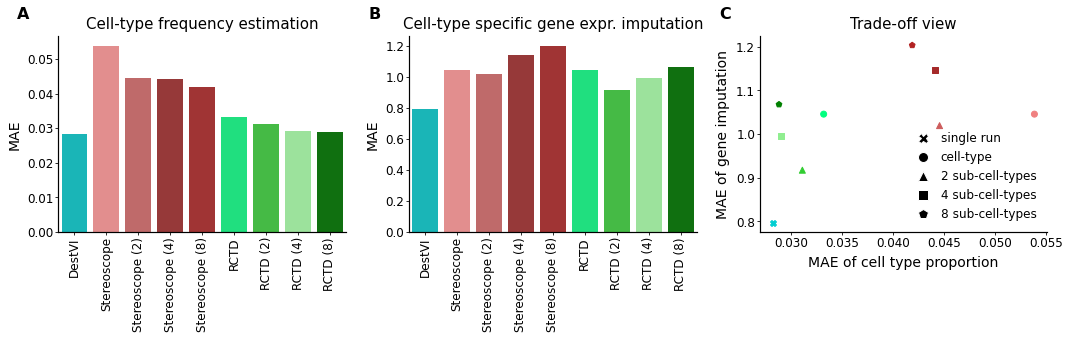

In [755]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["median_l1"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("MAE")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["median_l1"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("MAE")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["median_l1"][mask], gimp_ct_score.loc["median_l1"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("MAE of cell type proportion")
axes[2].set_ylabel("MAE of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)

# Sparser data

In [5]:
path = "/home/ubuntu/simu_runs/run_D/"
key_destvi = "destvi_latent" 
list_dir = [key_destvi,
            "stereo0", "stereo1", "stereo2", "stereo3",
            "RCTD0", "RCTD1", "RCTD2", "RCTD3"]
list_text = ["DestVI",
            "Stereoscope", "Stereoscope (2)", "Stereoscope (4)", "Stereoscope (8)",
            "RCTD", "RCTD (2)", "RCTD (4)", "RCTD (8)"]

list_colors = ["darkturquoise",
              "lightcoral", "indianred", "brown", "firebrick",
              "springgreen", "limegreen", "lightgreen", "green", ]
list_markers = ["X",
              "o", "^", "s", "p",
               "o", "^", "s", "p"]

dir_results = {}
for directory in list_dir:
    dir_results[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)

In [6]:
dir_results["RCTD2"]

,ct0,ct1,ct2,ct3,ct4,ct5,ct6,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,ct_long5,ct_long6,allct,proportions
avg_spearman,0.674428,0.698287,0.655472,0.554428,0.645135,0.611348,0.745611,0.933472,0.518321,0.342032,0.347806,0.244323,0.446500,0.289601,0.555574,0.912959
avg_pearson,0.732458,0.738036,0.640796,0.655100,0.689243,0.868814,0.804091,0.959097,0.558063,0.377947,0.348046,0.290479,0.474438,0.545222,0.606842,0.977445
w_spearman,0.793923,0.805462,0.824823,0.681859,0.456979,0.689069,0.843324,0.913261,0.794008,0.779200,0.842453,0.504388,0.458052,0.473489,0.934358,0.931097
w_pearson,0.870620,0.878200,0.851181,0.741042,0.496486,0.947028,0.886512,0.928454,0.877475,0.884390,0.876487,0.592028,0.496401,0.969891,0.973409,0.980348
iw_spearman,0.619937,0.391543,0.635079,0.399282,0.706607,0.516376,0.676531,0.959057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.899291
iw_pearson,0.709325,0.443547,0.631172,0.822982,0.727881,0.787929,0.746484,0.970945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975105
median_l1,0.418158,0.450613,0.497466,0.678796,2.015869,0.818578,0.930516,0.043040,0.089338,0.016833,0.010034,0.034280,0.146718,0.063051,0.069035,0.014863
mse,139.693189,23.489320,62.627667,29.876042,905.677991,110.086195,112.903050,318.475794,118.171832,19.459814,38.485886,18.682449,593.945673,71.519356,89.515258,0.046242
w_median_l1,809.494339,55.989083,192.519291,161.059118,6711.813786,536.064226,593.764666,262.542334,776.284075,83.158524,183.883439,85.315606,6394.470308,589.561265,631.492648,0.018379
w_mse,1431.127801,254.495782,349.983898,339.315629,12034.482565,1037.151815,1266.296422,4980.883401,1343.834930,215.605225,312.892673,211.982358,11717.305060,854.794977,997.973332,0.049389


In [7]:
dir_results[key_destvi]

,ct0,ct1,ct2,ct3,ct4,ct5,ct6,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,ct_long5,ct_long6,allct,proportions
avg_spearman,0.886660,0.723600,0.742481,0.414569,0.900900,0.735011,0.780381,0.939274,0.748016,0.384677,0.396538,0.194836,0.736806,0.379103,0.555234,0.919837
avg_pearson,0.883450,0.761235,0.686566,0.517697,0.907270,0.849910,0.815950,0.987687,0.748319,0.439526,0.378964,0.216541,0.733607,0.540202,0.616076,0.981783
w_spearman,0.935773,0.814245,0.913859,0.438362,0.947463,0.835486,0.849103,0.975096,0.937707,0.722292,0.921708,0.294783,0.942203,0.742518,0.913052,0.935706
w_pearson,0.935295,0.848302,0.883623,0.261371,0.965817,0.927025,0.904572,0.994351,0.937437,0.824042,0.902620,0.119621,0.958461,0.965881,0.967760,0.985050
iw_spearman,0.862743,0.484741,0.649920,0.307486,0.866071,0.666435,0.702739,0.775998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907744
iw_pearson,0.866818,0.569460,0.633167,0.808485,0.864684,0.795023,0.744209,0.955072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.979250
median_l1,0.211260,0.445442,0.574108,0.829517,0.947123,0.613351,0.728697,0.076301,0.064698,0.042192,0.027860,0.084873,0.166830,0.104317,0.159790,0.013531
mse,53.873798,31.944509,40.242274,41.222355,193.303398,39.190532,28.840920,72.107412,45.492369,24.614648,24.091201,27.206105,127.586861,29.605479,26.991426,0.035131
w_median_l1,228.697808,180.291420,227.398057,209.927662,746.152595,171.118782,52.787241,175.530326,215.411656,132.138984,163.663411,144.958742,727.953120,198.129179,154.037163,0.015068
w_mse,566.754728,402.355341,446.272805,509.669793,2518.293711,354.552614,312.601443,1080.944695,530.788554,307.029574,351.246201,336.503160,2455.892269,372.697052,340.721847,0.036849


In [8]:
# gather cell-type info
ct_score = []
for k in dir_results.keys():
    ct_score.append(dir_results[k]["proportions"])
ct_score = pd.concat(ct_score, axis=1)
ct_score.columns = list_text

# gather within-cell type info (e.g., ct0)
gimp_ct_score = []
for k in dir_results.keys():
    gimp_ct_score.append(dir_results[k][["ct" + str(i) for i in [0, 1, 2, 4, 5]]].mean(1))
gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
gimp_ct_score.columns = list_text

In [9]:
ct_score

,DestVI,Stereoscope,Stereoscope (2),Stereoscope (4),Stereoscope (8),RCTD,RCTD (2),RCTD (4),RCTD (8)
avg_spearman,0.919837,0.765265,0.781640,0.824311,0.855378,0.903810,0.907721,0.912959,0.916529
avg_pearson,0.981783,0.856366,0.905988,0.944625,0.961866,0.967513,0.973863,0.977445,0.978828
w_spearman,0.935706,0.808910,0.825556,0.853120,0.879661,0.922536,0.925817,0.931097,0.933809
w_pearson,0.985050,0.868476,0.913524,0.948384,0.965548,0.972502,0.977587,0.980348,0.981556
iw_spearman,0.907744,0.727144,0.744474,0.800369,0.835139,0.889445,0.893913,0.899291,0.903466
iw_pearson,0.979250,0.845043,0.898450,0.941316,0.958784,0.963596,0.970946,0.975105,0.976613
median_l1,0.013531,0.034730,0.028504,0.023069,0.019829,0.016213,0.015428,0.014863,0.014613
mse,0.035131,0.128825,0.107408,0.081064,0.065327,0.053784,0.049233,0.046242,0.044646
w_median_l1,0.015068,0.050480,0.039539,0.032017,0.026644,0.019899,0.018561,0.018379,0.018290
w_mse,0.036849,0.146272,0.122305,0.089449,0.070166,0.056737,0.051934,0.049389,0.047881


In [10]:
gimp_ct_score

,DestVI,Stereoscope,Stereoscope (2),Stereoscope (4),Stereoscope (8),RCTD,RCTD (2),RCTD (4),RCTD (8)
avg_spearman,0.797730,0.000000,0.377904,0.555604,0.549586,0.000000,0.434180,0.656934,0.764368
avg_pearson,0.817686,0.000000,0.405734,0.590420,0.598985,0.000000,0.486946,0.733869,0.820665
w_spearman,0.889365,0.000000,0.539865,0.674173,0.675741,0.000000,0.581252,0.714051,0.856221
w_pearson,0.912012,0.000000,0.580985,0.719726,0.724658,0.000000,0.644872,0.808703,0.915610
iw_spearman,0.705982,0.000000,0.352511,0.501432,0.519268,0.000000,0.379884,0.573909,0.659148
iw_pearson,0.745830,0.000000,0.391705,0.538082,0.547664,0.000000,0.446062,0.659971,0.719670
median_l1,0.558257,1.004541,0.969192,0.863131,1.008233,1.004541,0.952232,0.840137,0.902381
mse,71.710902,246.654474,226.081833,246.324882,204.200647,246.654474,223.747173,248.314872,250.298119
w_median_l1,310.731732,1253.642932,1189.402704,1630.820365,825.332847,1253.642932,1011.911857,1661.176145,909.249841
w_mse,857.645840,2949.916078,2694.455378,2940.636394,2390.684534,2949.916078,2705.436704,3021.448372,3059.759639


/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


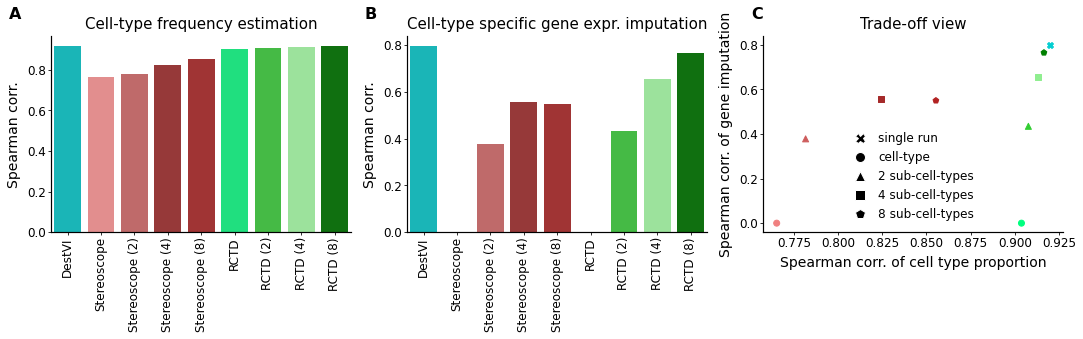

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["avg_spearman"], ax=axes[0], palette=list_colors)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Spearman corr.")
axes[0].set_title("Cell-type frequency estimation")
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_spearman"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel("Spearman corr.")
axes[1].set_title("Cell-type specific gene expr. imputation")
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_spearman"][mask], gimp_ct_score.loc["avg_spearman"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
    
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Spearman corr. of cell type proportion")
axes[2].set_ylabel("Spearman corr. of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].text(-0., 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


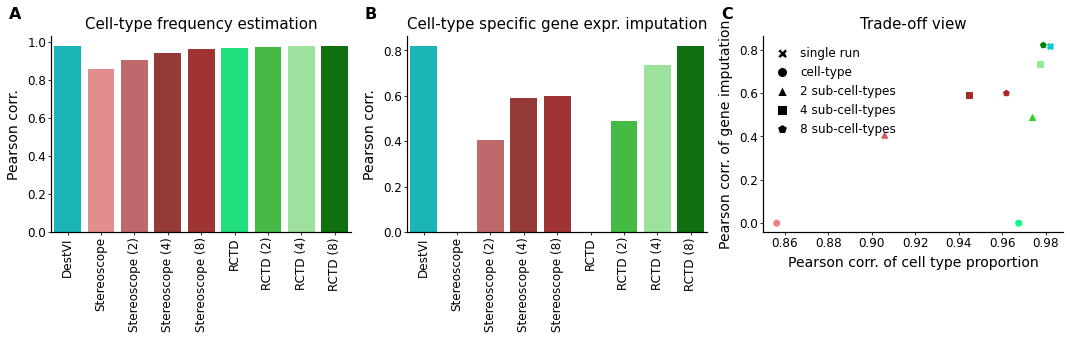

In [763]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["avg_pearson"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Pearson corr.")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_pearson"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("Pearson corr.")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_pearson"][mask], gimp_ct_score.loc["avg_pearson"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Pearson corr. of cell type proportion")
axes[2].set_ylabel("Pearson corr. of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


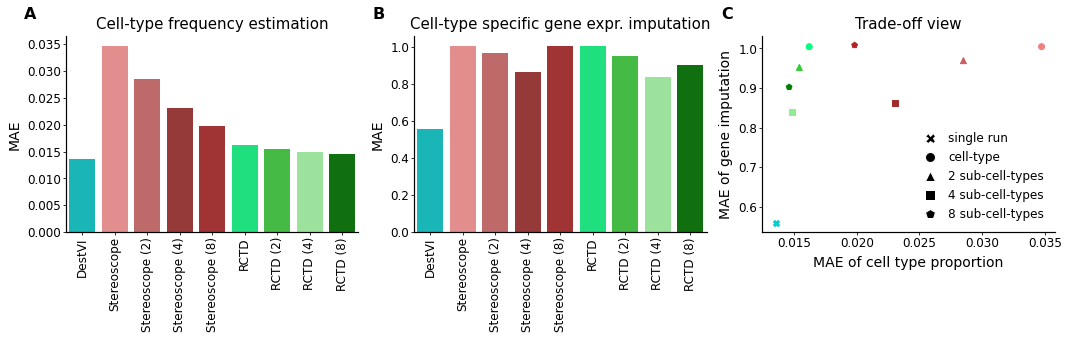

In [764]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["median_l1"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("MAE")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["median_l1"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("MAE")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["median_l1"][mask], gimp_ct_score.loc["median_l1"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("MAE of cell type proportion")
axes[2].set_ylabel("MAE of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)